In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data = pd.read_csv("football_players.csv")
df=pd.DataFrame(data)

In [3]:
df.head()

,Rank,Origin,Player,From(Country),From(Club),To(Country),To(Club),Position,Fee(€ mln),Fee(£ mln),Year,Born
0,1,Brazil,Neymar,Spain,Barcelona,France,Paris Saint-Germain,Forward,222.0,£198,2017,1992
1,2,France,Kylian Mbappé,France,Monaco,France,Paris Saint-Germain,Forward,180.0,£163,2018,1998
2,3,Brazil,Philippe Coutinho,England,Liverpool,Spain,Barcelona,Midfielder,145.0,£105,2018,1992
3,4,Portugal,João Félix,Portugal,Benfica,Spain,Atlético Madrid,Forward,126.0,£104.1,2019,1999
4,5,France,Antoine Griezmann,Spain,Atlético Madrid,Spain,Barcelona,Forward,120.0,£107,2019,1991


In [4]:
df['Year'].unique()

array([2017, 2018, 2019, 2021, 2016, 2013, 2009, 2014, 2020, 2001, 2015,
       2000], dtype=int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           54 non-null     int64  
 1   Origin         54 non-null     object 
 2   Player         54 non-null     object 
 3   From(Country)  54 non-null     object 
 4   From(Club)     54 non-null     object 
 5   To(Country)    54 non-null     object 
 6   To(Club)       54 non-null     object 
 7   Position       54 non-null     object 
 8   Fee(€ mln)     54 non-null     float64
 9   Fee(£ mln)     54 non-null     object 
 10  Year           54 non-null     int64  
 11  Born           54 non-null     int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 5.2+ KB


In [6]:
df.describe()

,Rank,Fee(€ mln),Year,Born
count,54.000000,54.000000,54.000000,54.000000
mean,27.444444,83.159259,2016.629630,1991.888889
std,15.716434,30.174258,4.296977,5.932535
min,1.000000,60.000000,2000.000000,1972.000000
25%,14.250000,64.625000,2015.250000,1989.250000
50%,27.500000,75.000000,2018.000000,1993.000000
75%,40.750000,86.500000,2019.000000,1996.000000
max,54.000000,222.000000,2021.000000,2000.000000


In [7]:
df.duplicated().sum()

0

In [9]:
E_player=df.head()
e_player=E_player[['Player','Fee(€ mln)']]

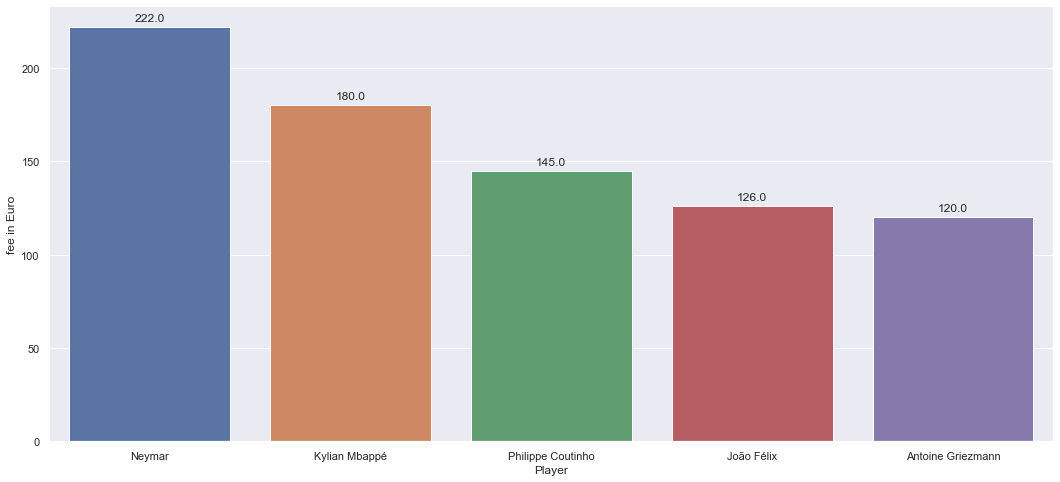

In [12]:
ig = plt.figure(figsize = (18, 8))
splot=sns.barplot(x=E_player['Player'],y=E_player['Fee(€ mln)'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.ylabel("fee in Euro")
sns.set(font_scale = 1)


In [181]:
df1 = df.groupby('From(Club)', as_index=False,sort=True)['Fee(€ mln)'].sum()
df1= df1.sort_values('Fee(€ mln)', ascending=False)

Text(0.5, 1.0, '10 clubs with the highest transfer revenues')

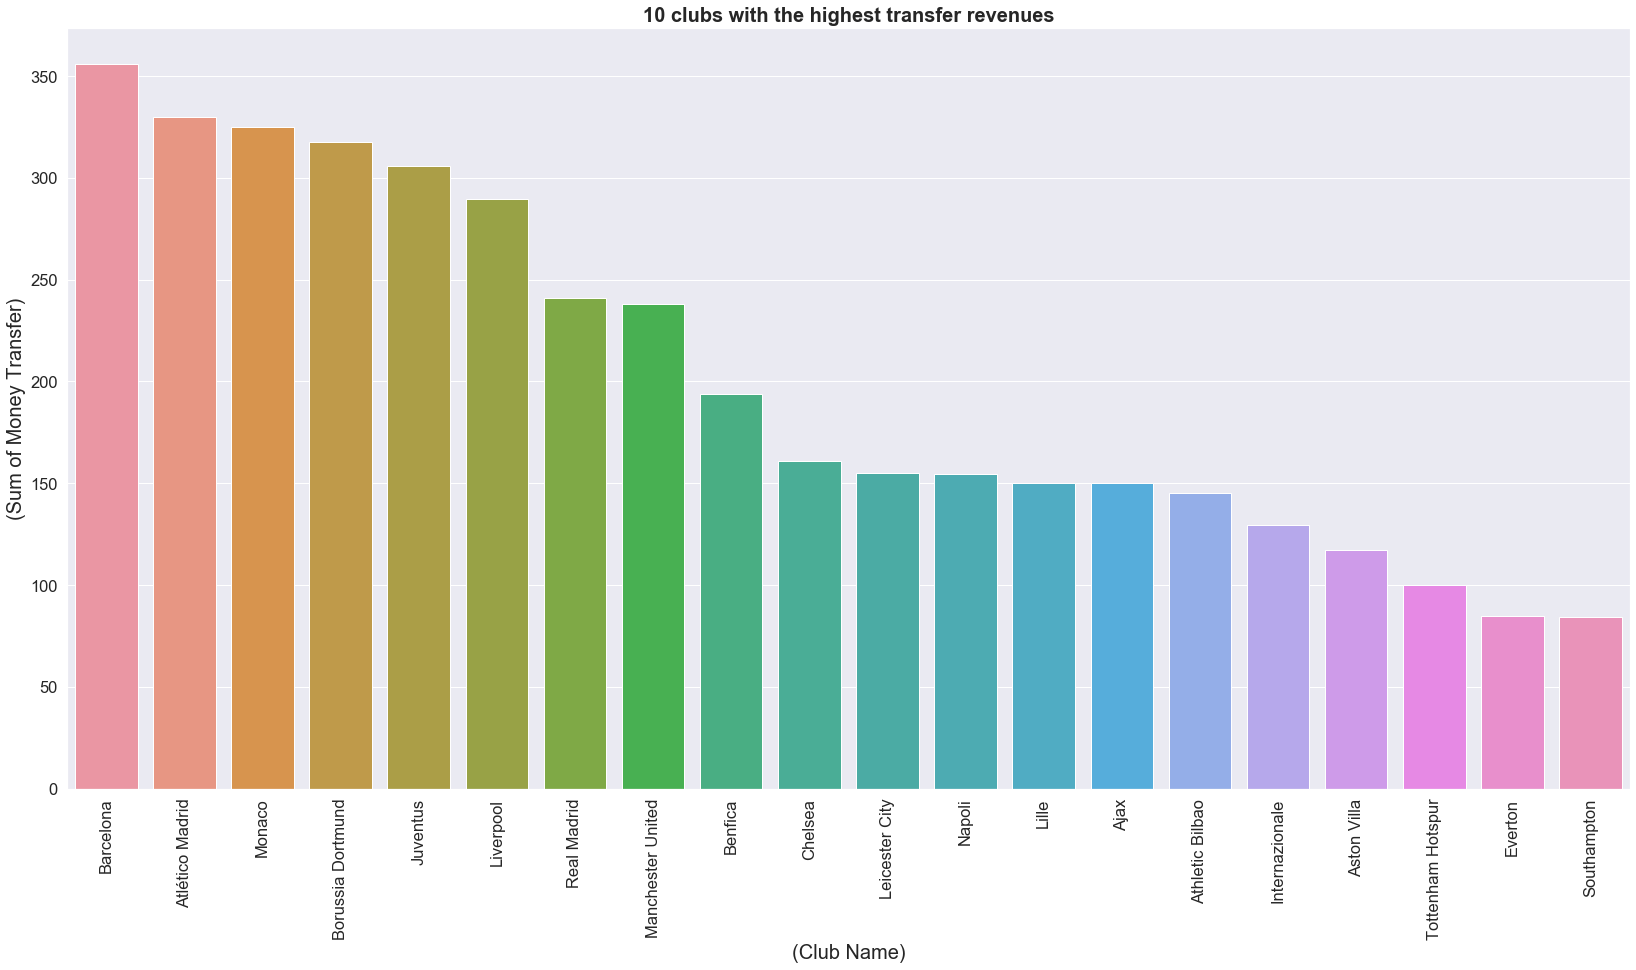

In [211]:
df1 = df1[0:20]
plt.figure(figsize=(28,14))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
plt.xticks(rotation=90)

p = sns.barplot(x='From(Club)',y='Fee(€ mln)',data=df1)
p.set_xlabel("(Club Name)", fontsize = 20)
p.set_ylabel("(Sum of Money Transfer)",fontsize = 20)
p.set_title("10 clubs with the highest transfer revenues",fontweight ='bold', fontsize = 20)

Text(0.5, 1.0, 'Fees per year')

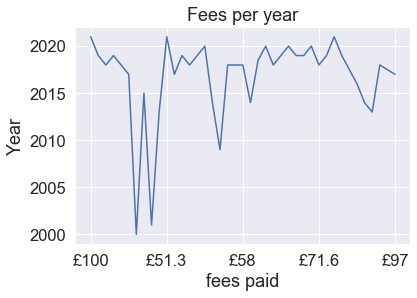

In [212]:
df.groupby('Fee(£ mln)')['Year'].median().plot()
plt.xlabel('fees paid')
plt.ylabel('Year')
plt.title('Fees per year')

In [73]:
df3 = df.groupby('Position')['Fee(€ mln)'].sum()
df3 = df3.sort_values(ascending = False)
df3

Position
Midfielder    1551.6
Forward       1491.3
Striker        720.5
Defender       584.7
Goalkeeper     142.5
Name: Fee(€ mln), dtype: float64

Text(0.5, 0, 'Sum of all fees (€ mln)')

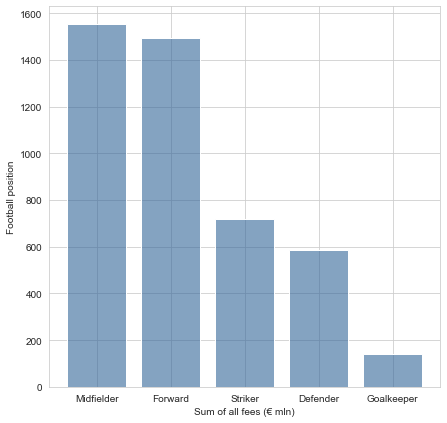

In [100]:
plt.figure(figsize=(7,7))
plt.bar(df3.index, df3,color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel("Football position")
plt.xlabel("Sum of all fees (€ mln)")

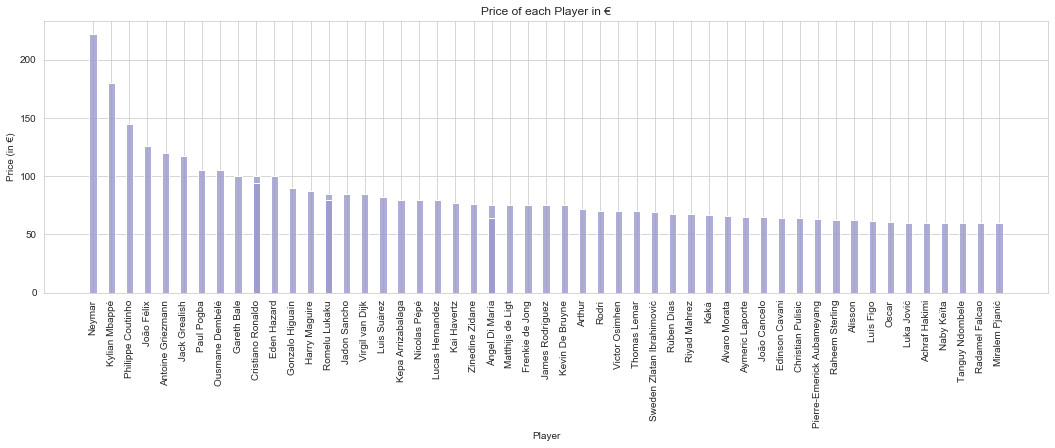

In [114]:
ig = plt.figure(figsize = (18, 5))
plt.bar(df['Player'],df['Fee(€ mln)'], color =(0.6, 0.6, 0.8, 0.8),
        width = 0.4)
 
plt.xlabel("Player")
plt.ylabel("Price (in €)")
plt.title("Price of each Player in €")
plt.xticks(rotation = 90)
plt.show()

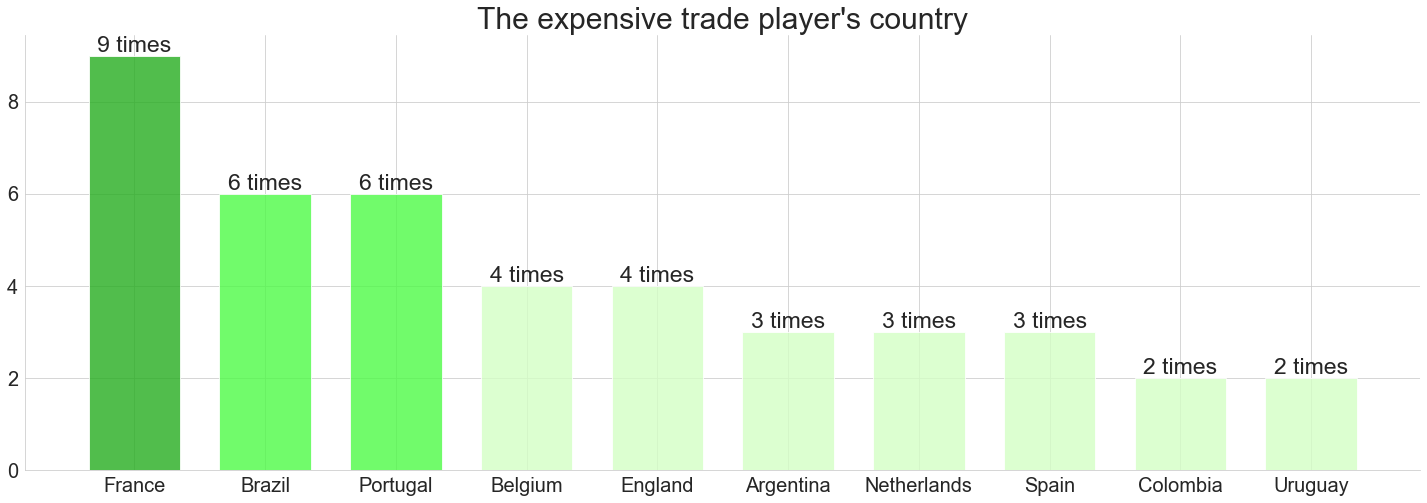

In [124]:
country = data['Origin'].value_counts()
country = pd.DataFrame(country[country > 1]).reset_index()
country.columns= ['country','count']
color = ['#26AD1F', '#4EFA46','#4EFA46']
color += ['#D4FFC5']*7
plt.figure(figsize=(25,8))
plt.bar(x=country['country'], height = country['count'],width=0.7,color =color,alpha=0.8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for i in range(len(country)):
    plt.text(s= f"{country.loc[i,'count']} times", x= i, y=country.loc[i,'count'],va='bottom', ha='center', fontsize=23)
    
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title("The expensive trade player's country",fontsize=30)
plt.show()